In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
from matplotlib.dates import date2num, DateFormatter
from sklearn.linear_model import LinearRegression
import numpy as np


In [2]:
# df contains epoch data on large models
sota = pd.read_csv("Datasets/notable_systems.csv")
# hard contains hardware data over time
hard = pd.read_csv("Datasets/ML_hardware.csv")
# alg contains data from study of algorithmic improvmenents in language models
alg = pd.read_csv("Datasets/Alg_bench.csv")


In [3]:
hard_names = hard.columns.tolist()
print(hard_names)

# format and read hardware datbase
hard["date"] = pd.to_datetime(hard["Release year"].astype(str) + "-01-01")
hard["date_num"] = hard["date"].apply(date2num)

# need computer per dollar column

sota = sota.dropna(subset=["Inference compute (FLOP)"])
# Sort data by the date to ensure it's in order
sota.sort_values("Publication date", inplace=True)

sota["date"] = pd.to_datetime(sota["Publication date"])
sota["date_num"] = sota["date"].apply(date2num)


['v', 'Manufacturer', 'FP64 Performance (FLOP/s)', 'FP32 Performance (FLOP/s)', 'FP16 Performance (FLOP/s)', 'FP/TF32 Tensor Performance (FLOP/s)', 'FP16 Tensor Performance (FLOP/s)', 'FP8 Tensor Performance (FLOP/s)', 'INT16 Performance (OP/s)', 'INT8 Tensor Performance (OP/s)', 'INT4 Tensor Performance (OP/s)', 'Memory size per board (Byte)', 'Memory Bandwidth (Byte/s)', 'Type of interconnect (Bus Interface)', 'interconnect speed (in GB/s, bidirectional)', 'Type of specialized point-to-point interconnect', 'Specialized point-to-point interconnect speed (in GB/s, bidirectional)', 'LambdaLabs FP32 ResNet-50 Pytorch Throughput (samples/s)', 'Release date', 'Release year', 'Release price (USD)', 'Cloud pricing ($ per hour) data from 03 July 2023; Google cloud and lambda labs prices', 'Manufacturing Process (Technology Node)', 'Number of transistors in million', 'Die Size in mm^2', 'TDP in W', 'Base Clock in MHz', 'Boost Clock in MHz', 'Memory Clock in MHz', 'Memory bus in bit', 'Shading 

/var/folders/lp/hk0h_6g94b59251kmlwhp32h0000gn/T/ipykernel_58277/2615280543.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PTBfit["date"] = pd.to_datetime(PTBfit["Publication date"])
/var/folders/lp/hk0h_6g94b59251kmlwhp32h0000gn/T/ipykernel_58277/2615280543.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PTBfit["date_num"] = PTBfit["date"].apply(date2num)


KeyError: 'year'

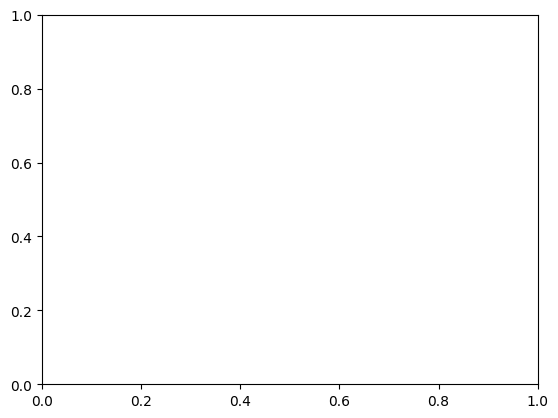

In [4]:
#find fit for PTB complexity
PTBfit = alg.dropna(subset=["Perplexity (PTB)"])
#convert publication date to datetime
PTBfit["date"] = pd.to_datetime(PTBfit["Publication date"])
PTBfit["date_num"] = PTBfit["date"].apply(date2num)
PTBfit["Perplexity (PTB)"]


# PTBfit["year"] = PTBfit["date_num"].dt.year

#graph the perplexity vs date over time
fig, ax = plt.subplots()
ax.plot(PTBfit["year"], np.log(PTBfit["Perplexity (PTB)"]), 'o')
#create a fit of the log of perplexity vs date
#fit the year to the log of perplexity



# fit = np.polyfit(PTBfit["date_num"], np.log(PTBfit["Perplexity (PTB)"]), 1)




#plot the fit
ax.plot(PTBfit["date"], fit[0]*PTBfit["date_num"] + fit[1])
ax.set_xlabel("Date")
ax.set_ylabel("Perplexity (PTB)")
ax.set_title("Perplexity vs Date")
#print fit paremeters
print(fit)
plt.show()

/var/folders/lp/hk0h_6g94b59251kmlwhp32h0000gn/T/ipykernel_6855/4086250767.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PTBfit["date"] = pd.to_datetime(PTBfit["Publication date"])
/var/folders/lp/hk0h_6g94b59251kmlwhp32h0000gn/T/ipykernel_6855/4086250767.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PTBfit["date_num"] = PTBfit["date"].apply(date2num)
/var/folders/lp/hk0h_6g94b59251kmlwhp32h0000gn/T/ipykernel_6855/4086250767.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy

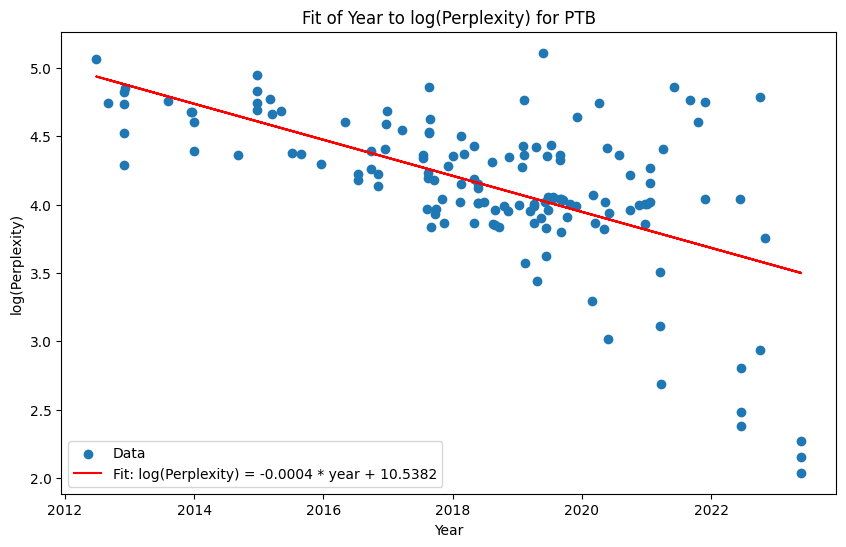

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
from scipy.optimize import curve_fit


alg = pd.read_csv("Datasets/Alg_bench.csv")

# Assuming 'alg' is your DataFrame containing the relevant data
PTBfit = alg.dropna(subset=["Perplexity (PTB)"])

# Convert publication date to datetime and numeric format
PTBfit["date"] = pd.to_datetime(PTBfit["Publication date"])
PTBfit["date_num"] = PTBfit["date"].apply(date2num)

# Take the logarithm of Perplexity (PTB)
PTBfit["log_perplexity"] = np.log(PTBfit["Perplexity (PTB)"])

# Define a linear function for fitting
def linear_func(x, a, b):
    return a * x + b

# Perform the curve fitting
params, covariance = curve_fit(linear_func, PTBfit["date_num"], PTBfit["log_perplexity"])

# Extract parameters
a, b = params

# Generate fit line
fit_line = linear_func(PTBfit["date_num"], a, b)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(PTBfit["date"], PTBfit["log_perplexity"], label='Data')
plt.plot(PTBfit["date"], fit_line, color='red', label=f'Fit: log(Perplexity) = {a:.4f} * year + {b:.4f}')
plt.xlabel('Year')
plt.ylabel('log(Perplexity)')
plt.title('Fit of Year to log(Perplexity) for PTB')
plt.legend()
plt.show()


/var/folders/lp/hk0h_6g94b59251kmlwhp32h0000gn/T/ipykernel_6855/3624967049.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PTBfit["date"] = pd.to_datetime(PTBfit["Publication date"])
/var/folders/lp/hk0h_6g94b59251kmlwhp32h0000gn/T/ipykernel_6855/3624967049.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PTBfit["seconds_since_2012"] = (PTBfit["date"] - reference_date).dt.total_seconds()
/var/folders/lp/hk0h_6g94b59251kmlwhp32h0000gn/T/ipykernel_6855/3624967049.py:20: SettingWithCopyWarning: 
A val

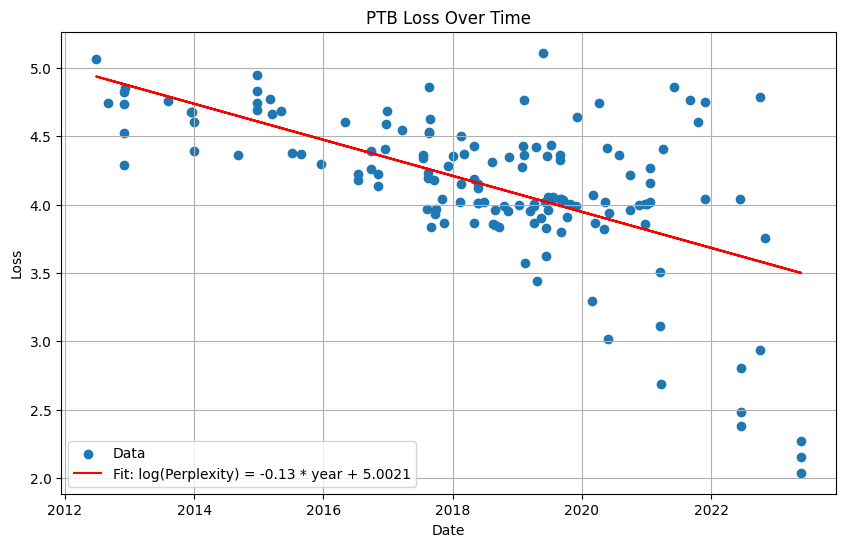

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
from scipy.optimize import curve_fit

# Assuming 'alg' is your DataFrame containing the relevant data
PTBfit = alg.dropna(subset=["Perplexity (PTB)"])

# Convert publication date to datetime format
PTBfit["date"] = pd.to_datetime(PTBfit["Publication date"])

# Reference date (e.g., January 1, 2012)
reference_date = pd.Timestamp('2012-01-01')

# Calculate the time delta in seconds since the reference date
PTBfit["seconds_since_2012"] = (PTBfit["date"] - reference_date).dt.total_seconds()

# Take the logarithm of Perplexity (PTB)
PTBfit["log_perplexity"] = np.log(PTBfit["Perplexity (PTB)"])

# Define a linear function for fitting
def linear_func(x, a, b):
    return a * x + b

# Perform the curve fitting
params, covariance = curve_fit(linear_func, PTBfit["seconds_since_2012"], PTBfit["log_perplexity"])

# Extract parameters
a, b = params

# Generate fit line
fit_line = linear_func(PTBfit["seconds_since_2012"], a, b)

# Convert seconds back to dates for plotting
PTBfit["date_from_seconds"] = reference_date + pd.to_timedelta(PTBfit["seconds_since_2012"], unit='s')

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(PTBfit["date_from_seconds"], PTBfit["log_perplexity"], label='Data')
plt.plot(PTBfit["date_from_seconds"], fit_line, color='red', label=f'Fit: log(Perplexity) = {356*24*60*60*a:.2f} * year + {b:.4f}')
plt.xlabel('Date')
plt.ylabel('Loss')
plt.title("PTB Loss Over Time")
plt.legend()
plt.grid()
plt.savefig("Figures/empirical_loss_trend.png")
plt.show()


In [98]:

# find all rows that have parameter count less then 1 billion and greater than 1 miilion

alg = alg.dropna(subset=["Parameters"])
start_lower = 1e2
end_lower = 2e9
start_upper = 5e9
end_upper = 1e20


# convert to numeric
alg["Parameters"] = pd.to_numeric(alg["Parameters"], errors="coerce")
alg["date"] = pd.to_datetime(alg["Publication date"])
alg["date_num"] = alg["date"].apply(date2num)
condition = (alg["Parameters"] < end_lower) & (alg["Parameters"] > start_lower)
algsmall = alg[condition]
algsmall = algsmall.dropna(subset=["Perplexity (PTB)"])
# algsmalltest = alg[(alg["Parameters"] < 1e6) & (alg["Parameters"] >  1e6)]
# algsmalltest = alg.dropna(subset=["Perplexity (PTB)"])
print(len(algsmall))
print("small param models")

bigcondition = (alg["Parameters"] > end_lower) & (alg["Parameters"] < end_upper)

# find all rows that have parameters count greater than 1 billion
algbig = alg[bigcondition]
algbig = algbig.dropna(subset=["Perplexity (PTB)"])
#print the number of models with parameters greater than 1 billion
print(len(algbig))
print("big param models")

119
small param models
8
big param models


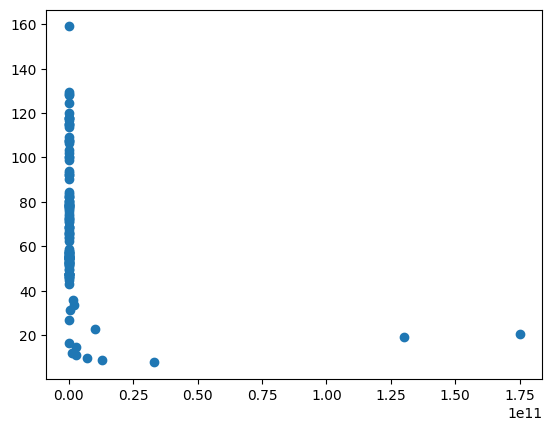

In [99]:
# just graph PTB perplexity for all models that have it 
algptb = alg.dropna(subset=["Perplexity (PTB)"])
algptb = algptb.dropna(subset=["Parameters"])
algptb = algptb.dropna(subset=["Publication date"])

#convert publication date to datetime
algptb["date"] = pd.to_datetime(algptb["Publication date"])
#graph perplexity vs date
algptb["date_num"] = algptb["date"].apply(date2num)


# plt.plot(algptb["date_num"], algptb["Perplexity (PTB)"], "o")
plt.plot(algptb["Parameters"], algptb["Perplexity (PTB)"], "o")


In [100]:

# print rows of algsmall
print(algsmall)
# print size of algsmall
print(algsmall.shape)
print(alg.shape, "full shape")

# plot perplexity vs time for algsmall
# algsmall["date"] = pd.to_datetime(algsmall["Publication date"])
# algsmall["date_num"] = algsmall["date"].apply(date2num)

# algbig["date"] = pd.to_datetime(algbig["Publication date"])
# algbig["date_num"] = algbig["date"].apply(date2num)


# create fit for algsmall:
X = algsmall["date_num"].values.reshape(-1, 1)
y = algsmall["Perplexity (PTB)"].values
reg = LinearRegression().fit(X, y)
y_pred_small = reg.predict(X)

slope = reg.coef_[0]
r_squared = reg.score(X, y)
print(f"Slope: {slope}, R^2: {r_squared}")



                    System                                          Author(s)  \
1            LSTM-300units     Martin Sundermeyer, Ralf Schlüter, Hermann Ney   
2                      RNN                      Tomas Mikolov, Geoffrey Zweig   
6        RNN+LDA+KN5+cache                      Tomas Mikolov, Geoffrey Zweig   
7                  RNN+LDA                      Tomas Mikolov, Geoffrey Zweig   
8      RNN (SGD+CLR) (PTB)  Yoshua Bengio, Nicolas Boulanger-Lewandowski, ...   
..                     ...                                                ...   
345   Stacked-LSTM+Pruning  Liangjian Wen, Xuanyang Zhang, Haoli Bai, Zeng...   
354    Compress-LSTM (66M)  Artem M. Grachev, Dmitry I. Ignatov, Andrey V....   
360  Mogrifier RLSTM (PTB)                                        Gábor Melis   
371   H-LSTM+wg+rcp+rcg+wp  Hongxu Yin, Guoyang Chen, Yingmin Li, Shuai Ch...   
386              SPN-4+KN5  W. Cheng, Stanley Kok, Hoai Vu Pham, Hai Leong...   

    Publication date  Year 

In [101]:
# create fit for algbig
X = algbig["date_num"].values.reshape(-1, 1)
y = algbig["Perplexity (PTB)"].values
reg = LinearRegression().fit(X, y)
y_pred_big = reg.predict(X)

slope = reg.coef_[0]
r_squared = reg.score(X, y)
print(f"Slope for Large Models: {slope}, R^2: {r_squared}")



Slope for Large Models: -0.010686633407247072, R^2: 0.6276192297228722


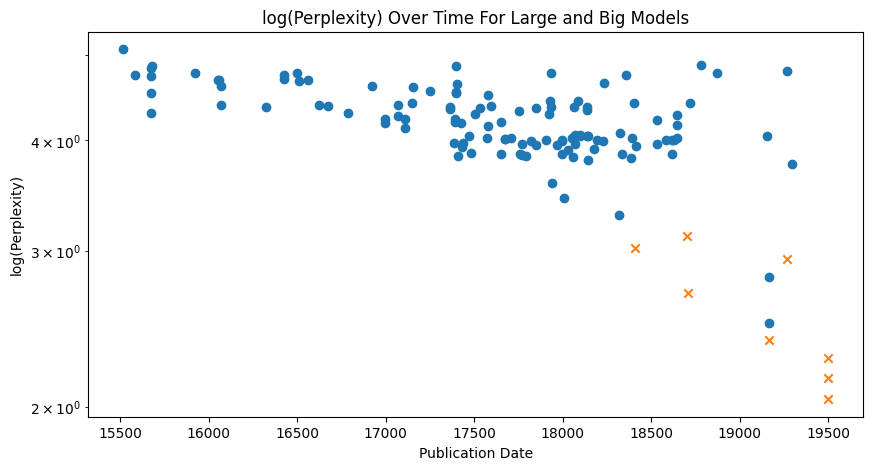

In [109]:
plt.figure(figsize=(10, 5))  # Set the size of the plot
plt.scatter(
    algsmall["date_num"], np.log(algsmall["Perplexity (PTB)"]), marker="o"
)  # Line plot with markers
plt.scatter(algbig["date_num"], np.log(algbig["Perplexity (PTB)"]), marker="x")
# plt.yscale("log")
# plt.plot(algsmall["date_num"], y_pred_small, color="b", label="Linear Fit (PTB)")
# plt.plot(algbig["date_num"], y_pred_big, color="r", label="Linear Fit (WT2)")
plt.ylabel("log(Perplexity)")
plt.xlabel("Publication Date")
plt.title("log(Perplexity) Over Time For Large and Big Models")
plt.yscale("log")


/var/folders/lp/hk0h_6g94b59251kmlwhp32h0000gn/T/ipykernel_58277/2358014079.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bucket_stats = all_data.groupby('year_bucket').apply(get_percentile_stats).reset_index()
/var/folders/lp/hk0h_6g94b59251kmlwhp32h0000gn/T/ipykernel_58277/2358014079.py:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  bucket_stats = all_data.groupby('year_bucket').apply(get_percentile_stats).reset_index()


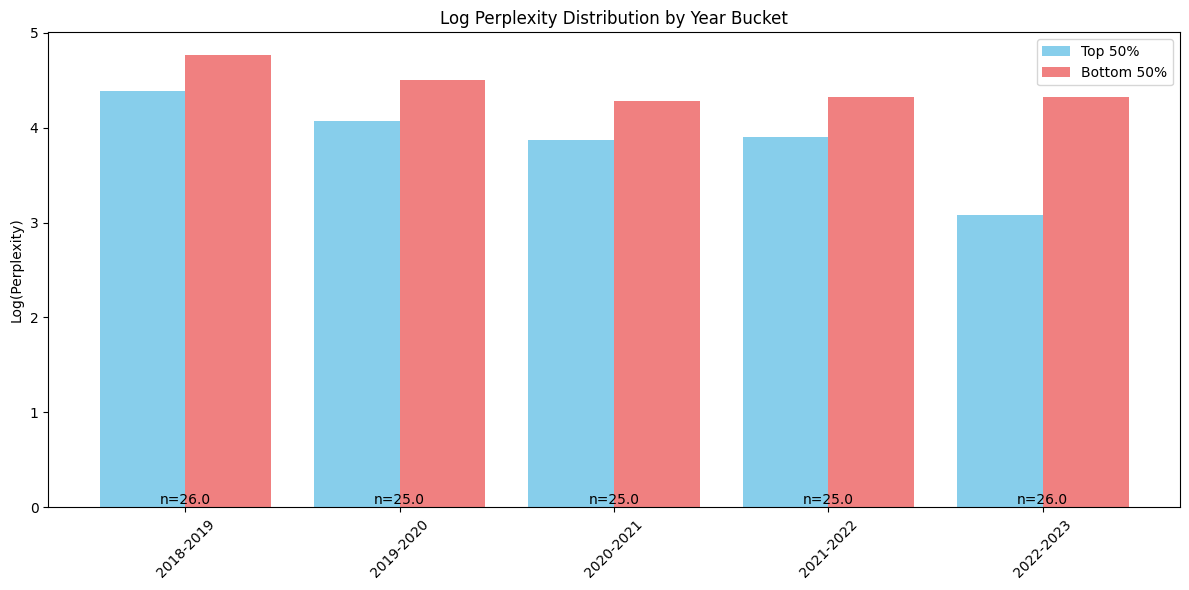

In [103]:
# First, let's combine the data and add a percentile column
all_data = pd.concat([
    algsmall[["date_num", "Perplexity (PTB)"]].assign(source="small"),
    algbig[["date_num", "Perplexity (PTB)"]].assign(source="big")
])

# Create year buckets (you can adjust the number of buckets as needed)
all_data['year_bucket'] = pd.qcut(all_data['date_num'], q=5, labels=['2018-2019', '2019-2020', '2020-2021', '2021-2022', '2022-2023'])

# Calculate percentiles for each year bucket
def get_percentile_stats(group):
    median = group['Perplexity (PTB)'].median()
    return pd.Series({
        'top_50': group[group['Perplexity (PTB)'] <= median]['Perplexity (PTB)'].mean(),
        'bottom_50': group[group['Perplexity (PTB)'] > median]['Perplexity (PTB)'].mean(),
        'count': len(group)
    })

bucket_stats = all_data.groupby('year_bucket').apply(get_percentile_stats).reset_index()

# Create the plot
plt.figure(figsize=(12, 6))
x = np.arange(len(bucket_stats))

# Plot top and bottom 50th percentiles
plt.bar(x - 0.2, np.log(bucket_stats['top_50']), width=0.4, label='Top 50%', color='skyblue')
plt.bar(x + 0.2, np.log(bucket_stats['bottom_50']), width=0.4, label='Bottom 50%', color='lightcoral')

# Customize the plot
plt.xticks(x, bucket_stats['year_bucket'], rotation=45)
plt.ylabel('Log(Perplexity)')
plt.title('Log Perplexity Distribution by Year Bucket')
plt.legend()

# Add count annotations
for i, count in enumerate(bucket_stats['count']):
    plt.text(i, plt.ylim()[0], f'n={count}', ha='center', va='bottom')

plt.tight_layout()

/var/folders/lp/hk0h_6g94b59251kmlwhp32h0000gn/T/ipykernel_58277/3579472695.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bucket_stats = all_data.groupby('year_bucket').apply(get_percentile_stats).reset_index()
/var/folders/lp/hk0h_6g94b59251kmlwhp32h0000gn/T/ipykernel_58277/3579472695.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  bucket_stats = all_data.groupby('year_bucket').apply(get_percentile_stats).reset_index()


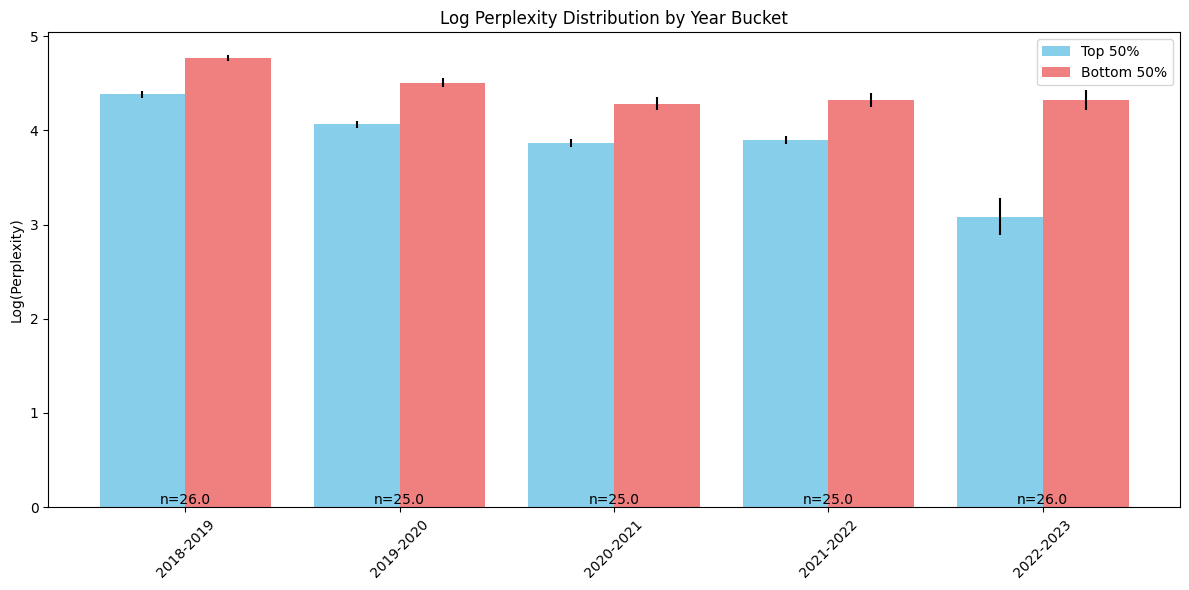

In [104]:
# First, let's combine the data and add a percentile column
all_data = pd.concat([
    algsmall[["date_num", "Perplexity (PTB)"]].assign(source="small"),
    algbig[["date_num", "Perplexity (PTB)"]].assign(source="big")
])

# Create year buckets
all_data['year_bucket'] = pd.qcut(all_data['date_num'], q=5, labels=['2018-2019', '2019-2020', '2020-2021', '2021-2022', '2022-2023'])

# Calculate percentiles and standard errors for each year bucket
def get_percentile_stats(group):
    median = group['Perplexity (PTB)'].median()
    top_50 = group[group['Perplexity (PTB)'] <= median]['Perplexity (PTB)']
    bottom_50 = group[group['Perplexity (PTB)'] > median]['Perplexity (PTB)']
    
    return pd.Series({
        'top_50_mean': top_50.mean(),
        'top_50_sem': top_50.sem(),
        'bottom_50_mean': bottom_50.mean(),
        'bottom_50_sem': bottom_50.sem(),
        'count': len(group)
    })

bucket_stats = all_data.groupby('year_bucket').apply(get_percentile_stats).reset_index()

# Create the plot
plt.figure(figsize=(12, 6))
x = np.arange(len(bucket_stats))

# Plot bars with error bars
plt.bar(x - 0.2, np.log(bucket_stats['top_50_mean']), width=0.4, 
        label='Top 50%', color='skyblue', yerr=bucket_stats['top_50_sem']/bucket_stats['top_50_mean'])
plt.bar(x + 0.2, np.log(bucket_stats['bottom_50_mean']), width=0.4, 
        label='Bottom 50%', color='lightcoral', yerr=bucket_stats['bottom_50_sem']/bucket_stats['bottom_50_mean'])

# Customize the plot
plt.xticks(x, bucket_stats['year_bucket'], rotation=45)
plt.ylabel('Log(Perplexity)')
plt.title('Log Perplexity Distribution by Year Bucket')
plt.legend()

# Add count annotations
for i, count in enumerate(bucket_stats['count']):
    plt.text(i, plt.ylim()[0], f'n={count}', ha='center', va='bottom')

plt.tight_layout()


New Date range: 2012-06-27 00:00:00 to 2023-05-23 00:00:00

Counts per year:
year_bucket
2012     7
2013     3
2014     5
2015     6
2016     9
2017    17
2018    18
2019    29
2020    14
2021     9
2022     7
2023     3
Name: count, dtype: int64


/var/folders/lp/hk0h_6g94b59251kmlwhp32h0000gn/T/ipykernel_58277/3679120065.py:52: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  bucket_stats = all_data.groupby('year_bucket').apply(get_param_percentile_stats).reset_index()


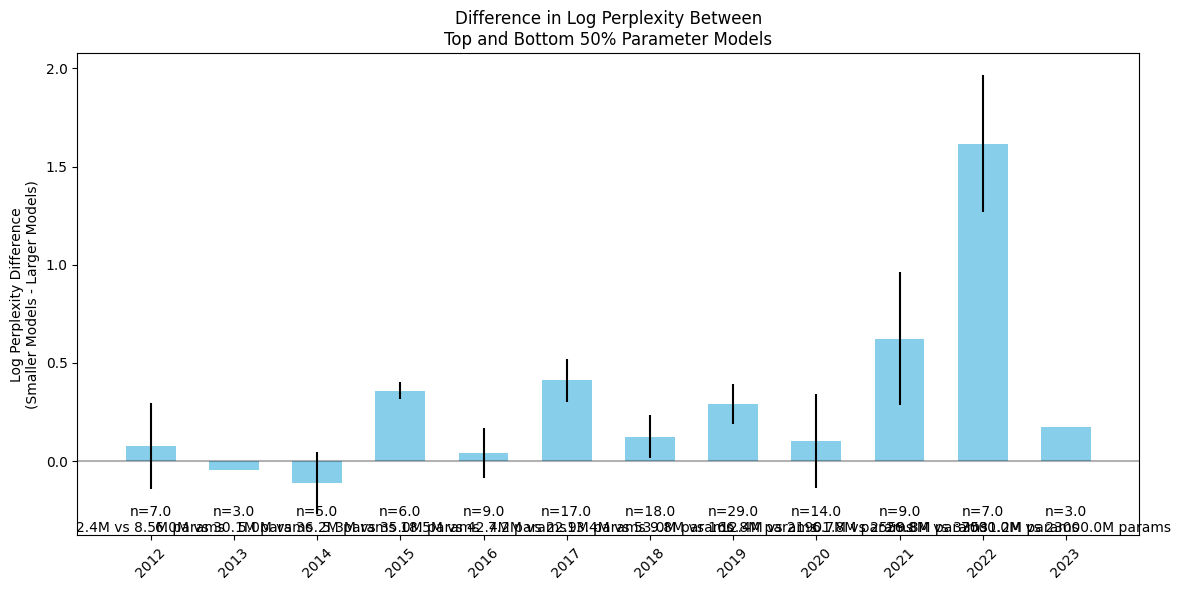

In [105]:
# First, let's combine the data
all_data = pd.concat([
    algsmall[["date_num", "Perplexity (PTB)", "Parameters"]].assign(source="small"),
    algbig[["date_num", "Perplexity (PTB)", "Parameters"]].assign(source="big")
])

# Convert date_num to actual dates with a different origin
# Assuming date_num might be days since Unix epoch (1970-01-01)
all_data['date'] = pd.to_datetime('1970-01-01') + pd.to_timedelta(all_data['date_num'], unit='D')
print("\nNew Date range:", all_data['date'].min(), "to", all_data['date'].max())

# Create proper year buckets based on the actual date range
min_year = all_data['date'].dt.year.min()
max_year = all_data['date'].dt.year.max()
all_data['year_bucket'] = all_data['date'].dt.year

print("\nCounts per year:")
year_counts = all_data['year_bucket'].value_counts().sort_index()
print(year_counts)

# Rest of the analysis remains the same
def get_param_percentile_stats(group):
    if len(group) < 2:  # Skip if not enough data points
        return pd.Series({
            'log_diff': np.nan,
            'log_diff_sem': np.nan,
            'count': len(group),
            'top_50_mean_params': np.nan,
            'bottom_50_mean_params': np.nan
        })
    
    median_params = group['Parameters'].median()
    top_50_params = group[group['Parameters'] >= median_params]
    bottom_50_params = group[group['Parameters'] < median_params]
    
    # Calculate log differences and their standard errors
    log_diff = np.log(bottom_50_params['Perplexity (PTB)'].mean()) - np.log(top_50_params['Perplexity (PTB)'].mean())
    
    # Calculate standard error of the difference
    sem_top = top_50_params['Perplexity (PTB)'].sem() / top_50_params['Perplexity (PTB)'].mean()
    sem_bottom = bottom_50_params['Perplexity (PTB)'].sem() / bottom_50_params['Perplexity (PTB)'].mean()
    log_diff_sem = np.sqrt(sem_top**2 + sem_bottom**2)
    
    return pd.Series({
        'log_diff': log_diff,
        'log_diff_sem': log_diff_sem,
        'count': len(group),
        'top_50_mean_params': top_50_params['Parameters'].mean(),
        'bottom_50_mean_params': bottom_50_params['Parameters'].mean()
    })

bucket_stats = all_data.groupby('year_bucket').apply(get_param_percentile_stats).reset_index()

# Create the plot
plt.figure(figsize=(12, 6))
x = np.arange(len(bucket_stats))

# Plot differences with error bars
plt.bar(x, bucket_stats['log_diff'], width=0.6, 
        color='skyblue', yerr=bucket_stats['log_diff_sem'])

# Customize the plot
plt.xticks(x, bucket_stats['year_bucket'], rotation=45)
plt.ylabel('Log Perplexity Difference\n(Smaller Models - Larger Models)')
plt.title('Difference in Log Perplexity Between\nTop and Bottom 50% Parameter Models')
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)

# Add count and parameter size annotations
for i, row in bucket_stats.iterrows():
    if not pd.isna(row['log_diff']):  # Only add annotation if we have data
        plt.text(i, plt.ylim()[0], 
                 f'n={row["count"]}\n{row["bottom_50_mean_params"]/1e6:.1f}M vs {row["top_50_mean_params"]/1e6:.1f}M params', 
                 ha='center', va='bottom')

plt.tight_layout()

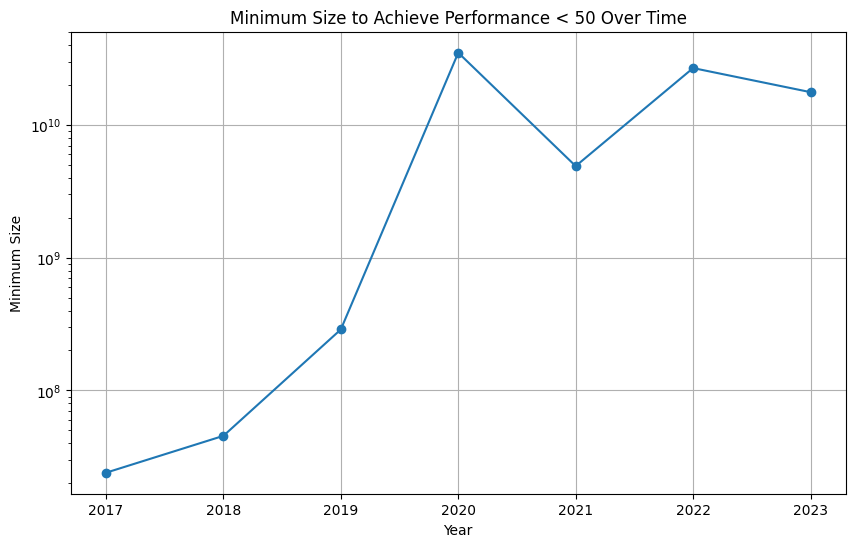

In [106]:


alg = alg.dropna(subset=["Perplexity (PTB)"])
# Filter the data for performance > 50 and find the minimum size for each year
filtered_df = alg[(alg['Perplexity (PTB)'] < 70) & (alg['Perplexity (PTB)'] < 50)]


min_size_per_year = filtered_df.groupby('Year')['Parameters'].mean().reset_index()

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(min_size_per_year['Year'], min_size_per_year['Parameters'], marker='o', linestyle='-')
plt.title('Minimum Size to Achieve Performance < 50 Over Time')
plt.xlabel('Year')
plt.ylabel('Minimum Size')
plt.yscale('log')
plt.grid(True)
plt.show()






['v', 'Manufacturer', 'FP64 Performance (FLOP/s)', 'FP32 Performance (FLOP/s)', 'FP16 Performance (FLOP/s)', 'FP/TF32 Tensor Performance (FLOP/s)', 'FP16 Tensor Performance (FLOP/s)', 'FP8 Tensor Performance (FLOP/s)', 'INT16 Performance (OP/s)', 'INT8 Tensor Performance (OP/s)', 'INT4 Tensor Performance (OP/s)', 'Memory size per board (Byte)', 'Memory Bandwidth (Byte/s)', 'Type of interconnect (Bus Interface)', 'interconnect speed (in GB/s, bidirectional)', 'Type of specialized point-to-point interconnect', 'Specialized point-to-point interconnect speed (in GB/s, bidirectional)', 'LambdaLabs FP32 ResNet-50 Pytorch Throughput (samples/s)', 'Release date', 'Release year', 'Release price (USD)', 'Cloud pricing ($ per hour) data from 03 July 2023; Google cloud and lambda labs prices', 'Manufacturing Process (Technology Node)', 'Number of transistors in million', 'Die Size in mm^2', 'TDP in W', 'Base Clock in MHz', 'Boost Clock in MHz', 'Memory Clock in MHz', 'Memory bus in bit', 'Shading 

/var/folders/lp/hk0h_6g94b59251kmlwhp32h0000gn/T/ipykernel_58277/3290482484.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pricedata["Price"] = pricedata[
/var/folders/lp/hk0h_6g94b59251kmlwhp32h0000gn/T/ipykernel_58277/3290482484.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pricedata["Price"] = pd.to_numeric(pricedata["Price"])
/var/folders/lp/hk0h_6g94b59251kmlwhp32h0000gn/T/ipykernel_58277/3290482484.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

Text(0.5, 0, 'Hardware Release Date')

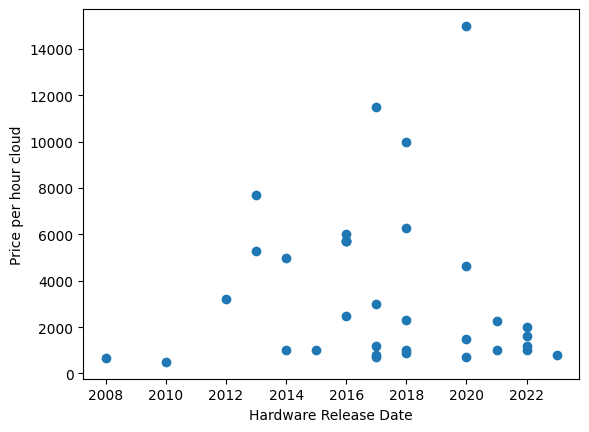

In [107]:


# tracking price of compute for GPU's over time
print(hard.columns.tolist())
pricedata = hard.dropna(
    subset=["Release price (USD)"]
)



pricedata["Price"] = pricedata[
    "Release price (USD)"
].replace({"\$": "", ",": ""}, regex=True)

# Step 3: Convert to numeric
pricedata["Price"] = pd.to_numeric(pricedata["Price"])
pricedata["Price/s"] = pricedata["Price"] / 3600

pricedata["date"] = pd.to_datetime(pricedata["Release year"].astype(str) + "-01-01")
pricedata["date_num"] = pricedata["date"].apply(date2num)

# print(pricedata["date", "date_num"])
# print and pricddat date and date_num side by side
print(pricedata[["date", "date_num"]])
plt.scatter(pricedata["date"], pricedata["Price"], marker="o")
plt.ylabel("Price per hour cloud")
plt.xlabel("Hardware Release Date")



   year          size       date  date_num
0  2017  1.200000e+10 2017-01-01   17167.0
1  2018  1.270000e+10 2018-01-01   17532.0
2  2019  1.980000e+10 2019-01-01   17897.0
3  2020  2.540000e+10 2020-01-01   18262.0
4  2021  3.350000e+10 2021-01-01   18628.0


Text(0.5, 1.0, 'Spending on GPU Compute Over Time')

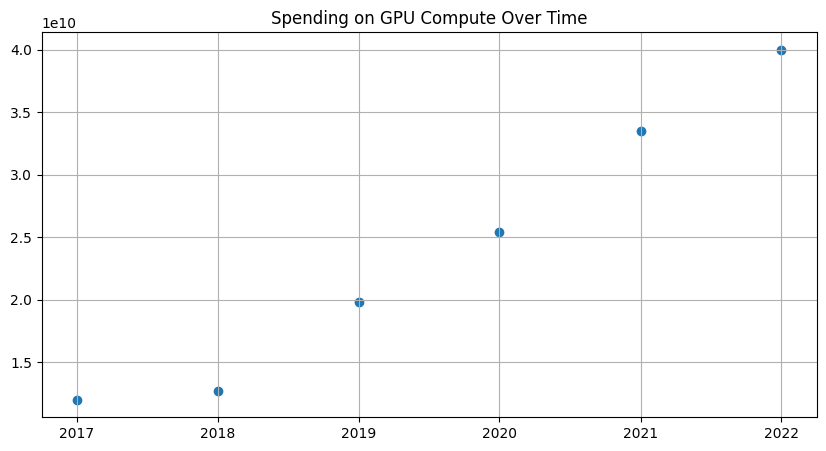

In [12]:
# make graphs of each time of overhang measure
# this includes dollars needed for given level of performance
# this also includes total ration of total compute/lowest inference cost for given performance


# world total compute esimates
total = pd.read_csv("Datasets/WorldTotalCompute.csv")

#convert total['year'] to datetime
total["date"] = pd.to_datetime(total["year"].astype(str) + "-01-01")
total["date_num"] = total["date"].apply(date2num)

print(total.head())
plt.figure(figsize=(10, 5))  # Set the size of the plot
plt.scatter(total["date"], total["size"], marker="o")  # Line plot with markers
plt.grid(True)
plt.title("Spending on GPU Compute Over Time")  # Title of the plot



these are the regressors [[19358.]
 [18993.]
 [18993.]
 [18993.]
 [18993.]
 [18628.]
 [18628.]
 [18262.]
 [18262.]
 [18262.]
 [18262.]
 [17532.]
 [17532.]
 [17532.]
 [17532.]
 [17532.]
 [17167.]
 [17167.]
 [17167.]
 [17167.]
 [17167.]
 [16801.]
 [16801.]
 [16801.]
 [16801.]
 [16436.]
 [16071.]
 [16071.]
 [15706.]
 [15706.]
 [15340.]
 [14610.]
 [13879.]
 [16801.]]
the dates considered are 0   2017-01-01
1   2018-01-01
2   2019-01-01
3   2020-01-01
4   2021-01-01
5   2022-01-01
Name: date, dtype: datetime64[ns]
the unix stamps are [[17167.]
 [17532.]
 [17897.]
 [18262.]
 [18628.]
 [18993.]]
the predicted price performance is [5.21300751e+09 6.91014336e+09 9.15979522e+09 1.21418390e+10
 1.61071431e+10 2.13509510e+10]


Text(0.5, 1.0, 'Price Performance Over Time')

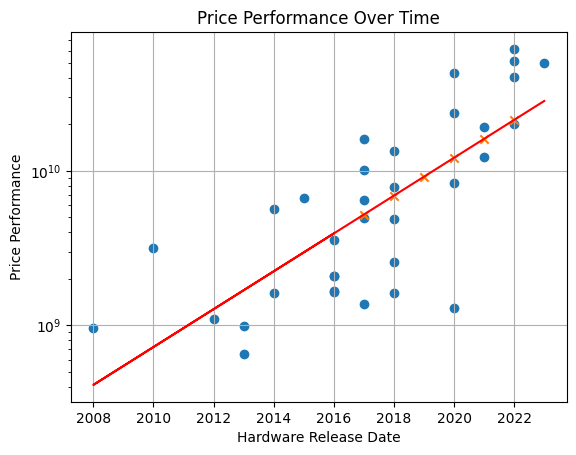

In [13]:
# get price performance data
pricedata = pricedata.dropna(subset=["FP32 Performance (FLOP/s)"])
pricedata["Price Performance"] = (
    pricedata["FP32 Performance (FLOP/s)"] / pricedata["Price"]
)
plt.scatter(pricedata["date"], pricedata["Price Performance"], marker="o")
plt.ylabel("Price Performance")
plt.xlabel("Hardware Release Date")
plt.grid(True)
plt.yscale("log")



X = pricedata["date_num"].values.reshape(-1, 1)
print(f"these are the regressors {X}")
y = np.log(pricedata["Price Performance"].values)
reg = LinearRegression().fit(X, y)

y_pred_price = np.exp(reg.predict(X))

# graph the fit
plt.plot(
    pricedata["date_num"],
    y_pred_price,
    color="r",
    label="Linear Fit (Price Performance)",
)

# total["date"] = pd.to_datetime(total["year"].astype(str) + "-01-01")
print("the dates considered are", total["date"])
# total["date_num"] = total["date"].astype(int)//10**9

#graph these predictions for the year in questions
#ie these are the years in which we have total hardware compute data 
predictpricep = np.exp(reg.predict(total["date_num"].values.reshape(-1, 1)))
# print("the predicted price performance is", predictpricep)

plt.scatter(total["date"], predictpricep, marker="x")
print("the unix stamps are", total["date_num"].values.reshape(-1, 1))
print("the predicted price performance is", predictpricep)
plt.title("Price Performance Over Time")
# print(total["year"].values.reshape(-1, 1))


the predicted prices [5.21300751e+09 6.91014336e+09 9.15979522e+09 1.21418390e+10
 1.61071431e+10 2.13509510e+10]
0    2.337853e+20
1    3.279732e+20
2    6.777952e+20
3    1.152566e+21
4    2.016559e+21
5    3.191720e+21
Name: World Flop/s, dtype: float64


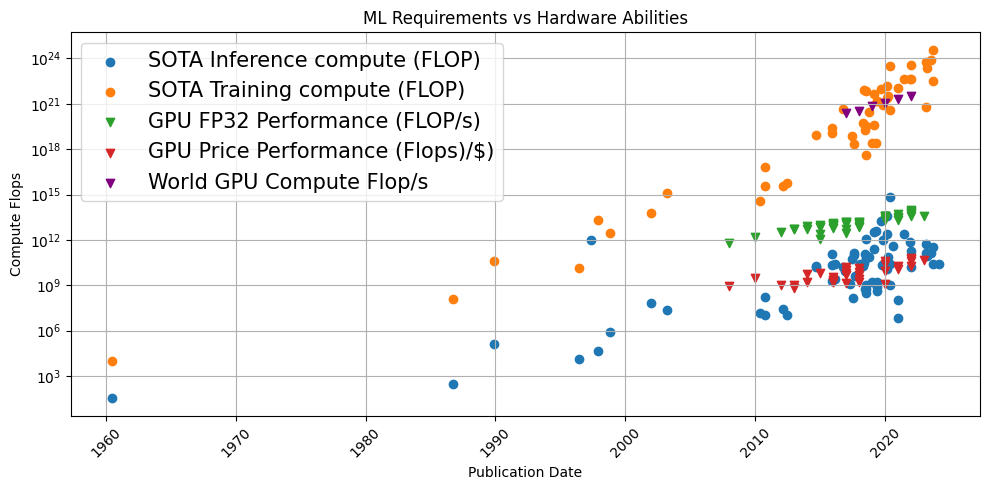

In [16]:
# Plotting the data
plt.figure(figsize=(10, 5))  # Set the size of the plot
plt.scatter(
    sota["date_num"], sota["Inference compute (FLOP)"], marker="o", label="SOTA Inference compute (FLOP)"
)  # Line plot with markers
plt.scatter(sota["date_num"], sota["Training compute (FLOP)"], marker="o", label="SOTA Training compute (FLOP)")
plt.scatter(hard["date_num"], hard["FP32 Performance (FLOP/s)"], marker="v", label="GPU FP32 Performance (FLOP/s)")
plt.scatter(pricedata["date"], pricedata["Price Performance"], marker="v", label="GPU Price Performance (Flops)/$)")

plt.title("ML Requirements vs Hardware Abilities")  # Title of the plot
plt.xlabel("Publication Date")  # Label for the x-axis
plt.ylabel("Compute Flops")  # Label for the y-axis
plt.yscale("log")
plt.grid(True)  # Add grid for better readability
plt.xticks(rotation=45)  # Rotate date labels for better visibility
plt.tight_layout()  # Adjust layout to not cut off labels


# make linear fit for price performance
X = pricedata["date_num"].values.reshape(-1, 1)
y = np.log(pricedata["Price Performance"].values)
reg = LinearRegression().fit(X, y)

y_pred_price = np.exp(reg.predict(X))



# Predict price performance for the years in the total compute dataset
# predictpricep = np.exp(reg.predict(total["year"].values.reshape(-1, 1)))
# print(total["year"].values.reshape(-1, 1))


# total GPU investment seems to double every 4 years to account for geometric growth
# the total stock of GPU is twice current sale
total_correction = (2**(-.75))/(1-2**-.25)
# Divide total compute by predicted price performance

total["World Flop/s"] = total_correction*total["size"]*predictpricep
print("the predicted prices", predictpricep)
print(total["World Flop/s"])

# convert year to datetiem
total["date"] = pd.to_datetime(total["year"].astype(str) + "-01-01")
plt.scatter(total["date"], total["World Flop/s"], marker="v", color="purple",label="World GPU Compute Flop/s")
plt.legend(fontsize=15)
plt.savefig("Figures/SOTA_vs_hardware.png")
plt.show()

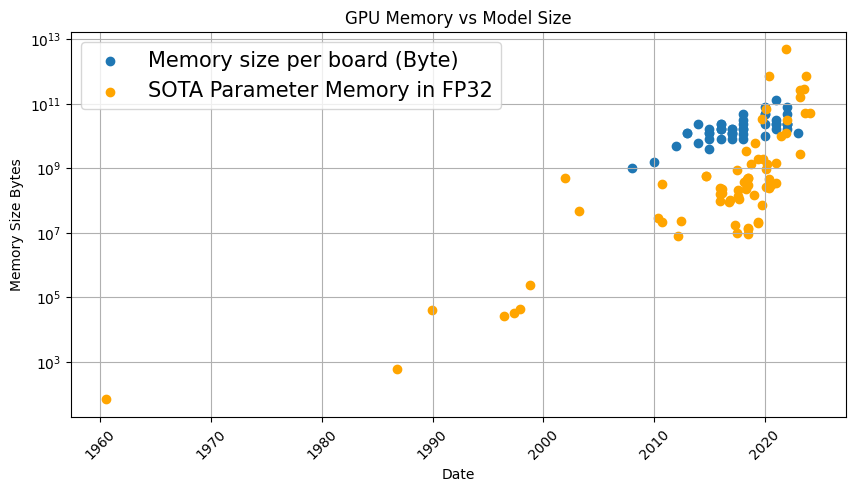

In [34]:

# memory size plot
plt.figure(figsize=(10, 5))  # Set the size of the plot

# df["date"] = pd.to_datetime(df["date_num"])
# df["date_num"] = df["date"].apply(date2num)

# hard["date"] = pd.to_datetime(hard["date_num"])
# hard["date_num"] = hard["date"].apply(date2num)




plt.scatter(
    hard["date"], hard["Memory size per board (Byte)"], marker="o", label="Memory size per board (Byte)"
)  # Line plot with markers
plt.scatter(sota["date"], 4*sota["Parameters"], marker="o", color="orange", label="SOTA Parameter Memory in FP32")

#labels are still in unix time



plt.grid(True)  # Add grid for better readability
plt.legend(fontsize=15)
plt.xlabel("Date")  # Label for the x-axis
plt.ylabel("Memory Size Bytes")  # Label for the y-axis
plt.yscale("log")
plt.title("GPU Memory vs Model Size")
plt.xticks(rotation=45) 
plt.show()  # Display the plot

#labels are still in unix time 
# need to convert to datetime


# Set the x-ticks to display the year every five years
# start_date = df["date"].min().year
# end_date = df["date"].max().year
# plt.xticks(pd.date_range(start=f"{start_date}-01-01", end=f"{end_date}-01-01", freq='5Y').to_pydatetime())



In [ ]:


# graph performance/model size by year 

